#### IRIS FLOWER CLASSIFICATION

The Iris Flower dataset is a classic multivariate dataset introduced by British statistician and biologist Ronald Fisher in his 1936 paper “The Use of Multiple Measurements in Taxonomic Problems.” It is also referred to as Anderson's Iris dataset, as the data was originally collected by Edgar Anderson to study the morphological variation among three species of Iris flowers: Iris setosa, Iris versicolor, and Iris virginica.

The dataset contains 150 samples — 50 from each species — with four numerical features measured for each flower: sepal length, sepal width, petal length, and petal width, all in centimeters. 

#### Importing the necessary libraries

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
iris=pd.read_csv("D:/New folder/Codsoft Internship/Iris classification/IRIS.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [193]:
iris.shape

(150, 5)

In [189]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [151]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   y             150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [154]:
# Checking for missing values

iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
y               0
dtype: int64

#### EDA

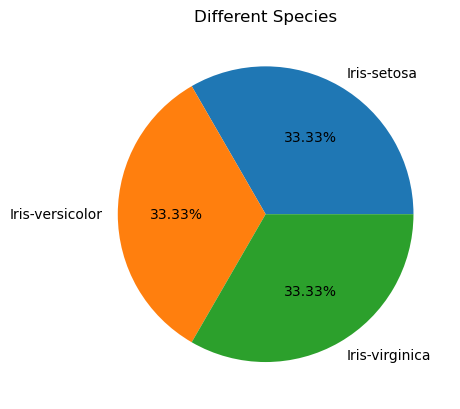

In [29]:
plt.pie(iris['species'].value_counts(),labels=iris['species'].value_counts().index,autopct="%1.2f%%")
plt.title("Different Species")
plt.show()

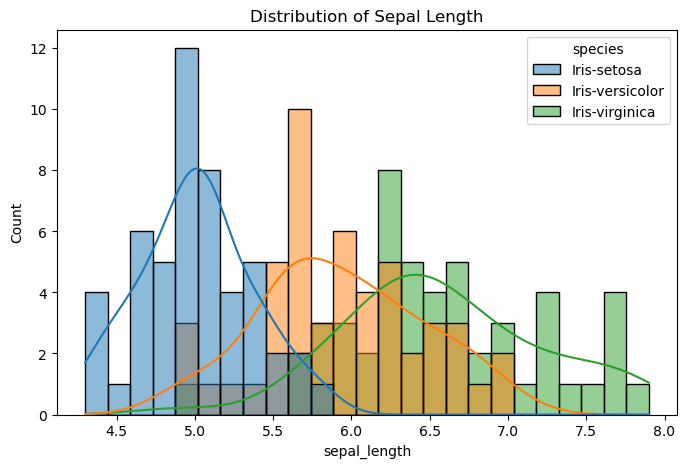

In [31]:
plt.figure(figsize=(8, 5))
sns.histplot(data=iris, x='sepal_length', bins=25,kde=True,hue='species')
plt.title("Distribution of Sepal Length")
plt.show()

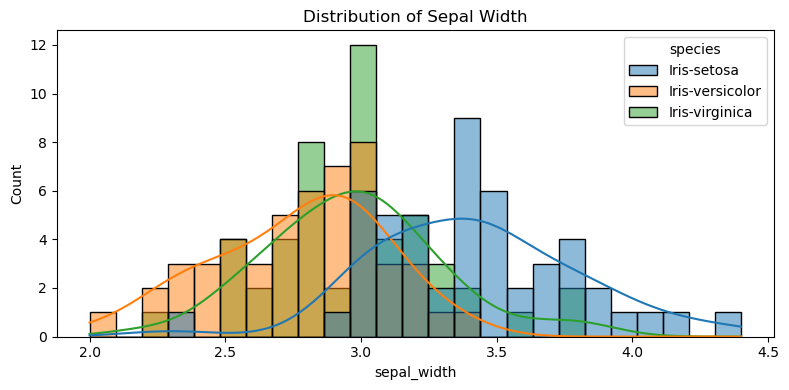

In [35]:
plt.figure(figsize=(8, 4))
sns.histplot(data=iris, x='sepal_width', bins=25,kde=True,hue='species')
plt.title("Distribution of Sepal Width")
plt.tight_layout()
plt.show()

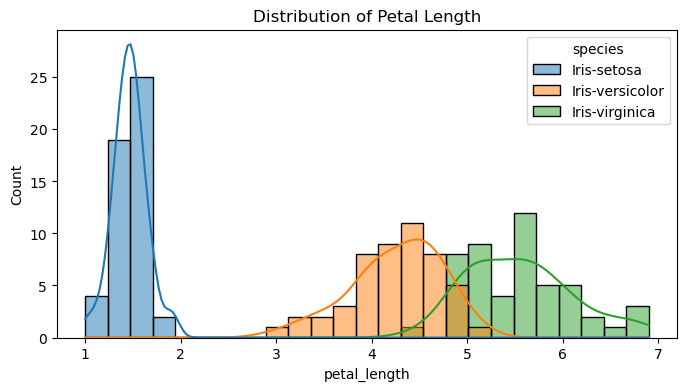

In [37]:
plt.figure(figsize=(8, 4))
sns.histplot(data=iris, x='petal_length', bins=25,kde=True,hue='species')
plt.title("Distribution of Petal Length")
plt.show()

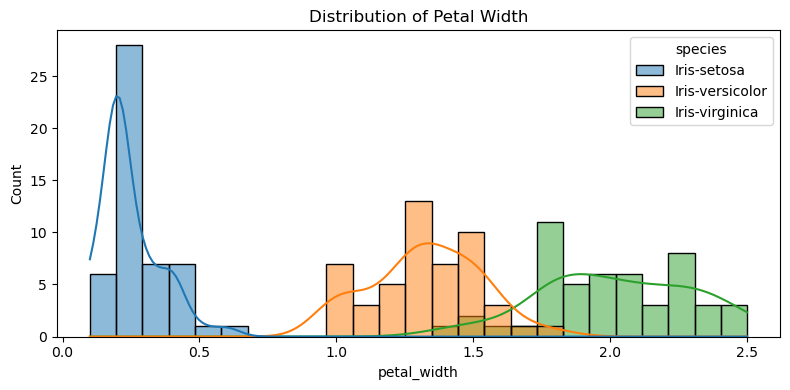

In [39]:
plt.figure(figsize=(8, 4))
sns.histplot(data=iris, x='petal_width', bins=25,kde=True,hue='species')
plt.title("Distribution of Petal Width")
plt.tight_layout()
plt.show()

In [49]:
iris['y']=iris['species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [51]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,y
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [53]:
X = iris.drop(columns=['species', 'y']) 
y = iris['y']

In [55]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [42]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: y, Length: 150, dtype: int64

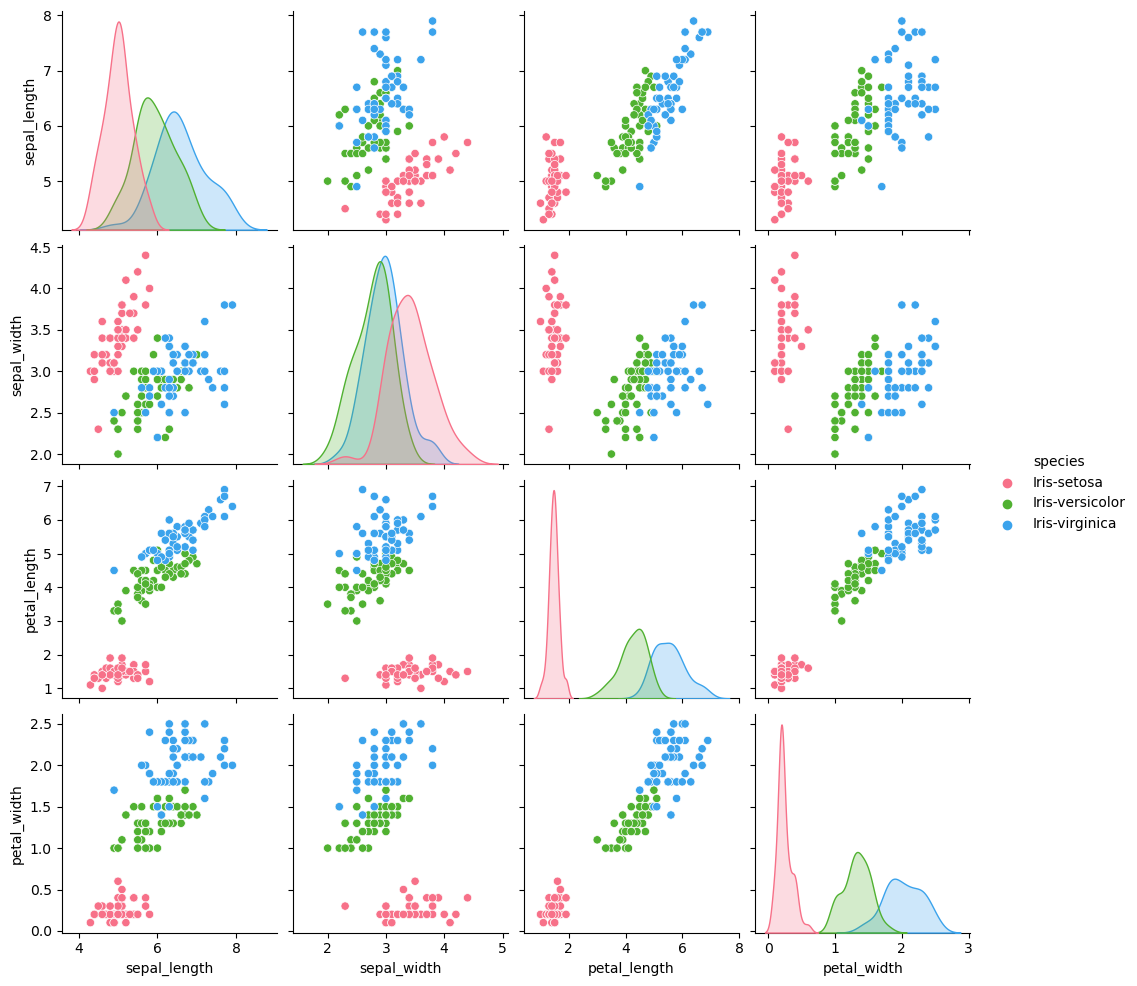

In [43]:
df = iris.drop(columns=['y'])  

sns.pairplot(df, hue="species", palette="husl")

### Machine Learning

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

To split data into training and test sets (80% train, 20% test)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

To standardise the data

In [128]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Logistic Regression

In [130]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [132]:
y_pred=lr.predict(X_test)

In [134]:
y_pred

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 1, 2, 2, 1, 0, 2, 0], dtype=int64)

In [136]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9333333333333333

Using 5-Fold Cross‑Validation to get more stable accuracy score. This averages over five different splits of the data. That smooths out the ups and downs and gives the mean performance.

In [138]:
scores = cross_val_score(lr, X, y, cv=5, scoring='accuracy')
print("5‑fold accuracies:", scores)             
print("Mean CV accuracy:", scores.mean())

5‑fold accuracies: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean CV accuracy: 0.9733333333333334


#### Random Forest

In [141]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [143]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2,
       1, 1, 2, 2, 1, 0, 2, 0], dtype=int64)

In [145]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.9

In [147]:
scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print("5‑fold accuracies:", scores)             
print("Mean CV accuracy:", scores.mean())

5‑fold accuracies: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean CV accuracy: 0.9666666666666668


Logistic Regression slightly outperformed the Random Forest Classifier, indicating it was better suited for this dataset.